# Question 0

In [305]:
#Setup
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [306]:
#Prepare the data

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Question 1

Propose an architecture A of a neural network without convolution (the activation function of the
output layer should be the softmax function).

In [307]:
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



In [308]:
#model1.summary()

# Question 2

Propose an architecture B of a convolutional neural network.

In [309]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)



# Question 3
Implement architectures A and B, illustrate them in text form and with a diagram (use the functions
available in Keras).

In [311]:
# architecture A

In [312]:
model1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [313]:
import pydot
import graphviz

In [314]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nathanael\anaconda3\python.exe -m pip install --upgrade pip' command.


In [315]:
conda install pydotplus


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [316]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nathanael\anaconda3\python.exe -m pip install --upgrade pip' command.


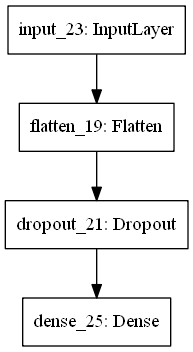

In [317]:
#diagramm

keras.utils.plot_model(model1, "my_first_model.png")

In [318]:
# architecture B

In [319]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 64)              

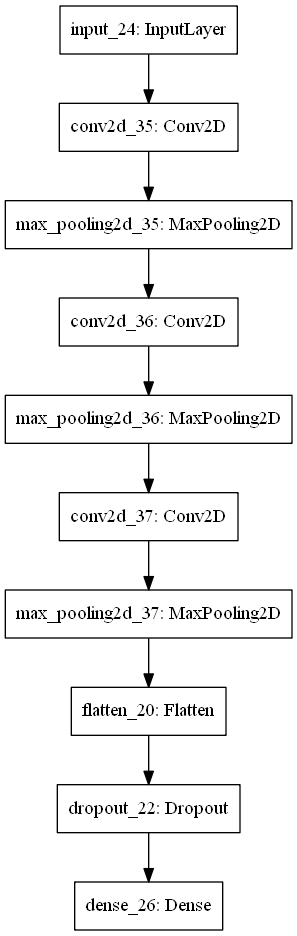

In [320]:
#diagramm

keras.utils.plot_model(model2, "my_second_model.png")

# Question 4
Train the neural network on the MNIST dataset (training set only).

In [321]:
#Architecture A
batch_size = 128
epochs = 15

model1.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])



In [322]:
model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 1s 2ms/step - loss: 1.4199 - accuracy: 0.5824 - val_loss: 0.8186 - val_accuracy: 0.8522
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.8648 - accuracy: 0.7667 - val_loss: 0.5960 - val_accuracy: 0.8828
Epoch 3/15
422/422 [==============================] - 1s 1ms/step - loss: 0.7300 - accuracy: 0.7984 - val_loss: 0.5070 - val_accuracy: 0.8933
Epoch 4/15
422/422 [==============================] - 1s 1ms/step - loss: 0.6653 - accuracy: 0.8125 - val_loss: 0.4582 - val_accuracy: 0.8985
Epoch 5/15
422/422 [==============================] - 1s 1ms/step - loss: 0.6214 - accuracy: 0.8239 - val_loss: 0.4272 - val_accuracy: 0.9020
Epoch 6/15
422/422 [==============================] - 1s 1ms/step - loss: 0.5962 - accuracy: 0.8298 - val_loss: 0.4053 - val_accuracy: 0.9048
Epoch 7/15
422/422 [==============================] - 1s 1ms/step - loss: 0.5789 - accuracy: 0.8335 - val_loss: 0.3882 - val_accuracy: 0.9075
Epoch 

In [323]:
train1=model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5061 - accuracy: 0.8510 - val_loss: 0.3248 - val_accuracy: 0.9178
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.8563 - val_loss: 0.3212 - val_accuracy: 0.9180
Epoch 3/15
422/422 [==============================] - 1s 1ms/step - loss: 0.4957 - accuracy: 0.8554 - val_loss: 0.3181 - val_accuracy: 0.9197
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.8568 - val_loss: 0.3152 - val_accuracy: 0.9205
Epoch 5/15
422/422 [==============================] - 1s 1ms/step - loss: 0.4889 - accuracy: 0.8574 - val_loss: 0.3123 - val_accuracy: 0.9208
Epoch 6/15
422/422 [==============================] - 1s 1ms/step - loss: 0.4883 - accuracy: 0.8573 - val_loss: 0.3104 - val_accuracy: 0.9210
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.8566 - val_loss: 0.3082 - val_accuracy: 0.9222
Epoch 

In [324]:
#Architecture B

batch_size = 128
epochs = 15

model2.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

train2=model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 16s 38ms/step - loss: 2.1000 - accuracy: 0.2931 - val_loss: 1.4503 - val_accuracy: 0.7702
Epoch 2/15
422/422 [==============================] - 16s 38ms/step - loss: 1.1277 - accuracy: 0.6513 - val_loss: 0.5261 - val_accuracy: 0.8790
Epoch 3/15
422/422 [==============================] - 16s 38ms/step - loss: 0.7178 - accuracy: 0.7797 - val_loss: 0.3206 - val_accuracy: 0.9223
Epoch 4/15
422/422 [==============================] - 17s 41ms/step - loss: 0.5686 - accuracy: 0.8291 - val_loss: 0.2594 - val_accuracy: 0.9322
Epoch 5/15
422/422 [==============================] - 17s 40ms/step - loss: 0.4845 - accuracy: 0.8539 - val_loss: 0.2130 - val_accuracy: 0.9425
Epoch 6/15
422/422 [==============================] - 17s 40ms/step - loss: 0.4307 - accuracy: 0.8703 - val_loss: 0.2011 - val_accuracy: 0.9450
Epoch 7/15
422/422 [==============================] - 17s 40ms/step - loss: 0.3903 - accuracy: 0.8830 - val_loss: 0.1673 - val_accuracy:

# Question5
Visualize the evolution of the model’s accuracy (for both training and validation sets) during learning

In [325]:
import matplotlib.pyplot as plt

In [326]:
model2.save("my_model2") # save the model (save structure and fit)
#del model1 # delete the model

INFO:tensorflow:Assets written to: my_model2\assets


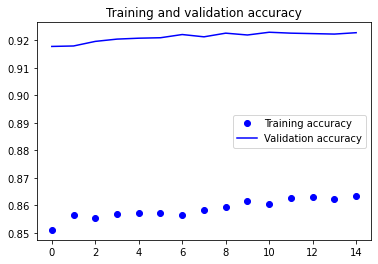

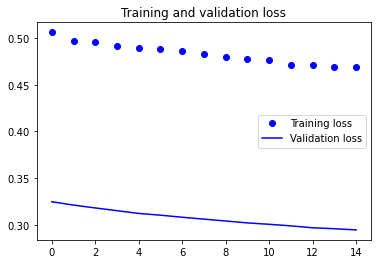

In [327]:
#Architecture A
accuracy = train1.history['accuracy']
val_accuracy = train1.history['val_accuracy']
loss = train1.history['loss']
val_loss = train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

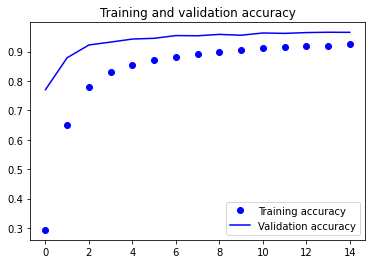

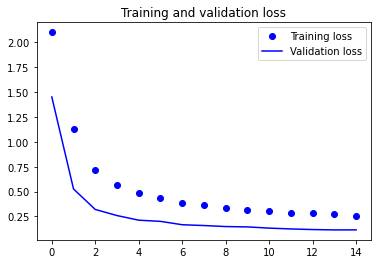

In [328]:
#Architecture B
accuracy = train2.history['accuracy']
val_accuracy = train2.history['val_accuracy']
loss = train2.history['loss']
val_loss = train2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Question6
Visualize the prediction of the neural network for a new input image (from the test set), i.e. on the
same figure:
– View the input image
– View network predictions (probabilities of class membership)

In [329]:
#prediction 1
predicted = model1.predict(x_test)
predicted
pred = np.argmax(predicted, axis = 1)[:10] 
label = np.argmax(y_test,axis = 1)[:10] 


print(predicted)
print(pred)
print(label)


[[2.28663761e-04 1.15948467e-06 3.42932355e-04 ... 9.90560472e-01
  2.61276728e-04 5.13791107e-03]
 [1.19626438e-02 4.13600501e-04 8.80410254e-01 ... 7.48948281e-08
  7.90772215e-03 1.55246596e-06]
 [1.29780907e-04 9.40488160e-01 1.93364695e-02 ... 5.66404220e-03
  1.16275856e-02 3.13376333e-03]
 ...
 [4.18575792e-06 1.28128295e-05 1.98030888e-04 ... 7.87251350e-03
  2.31096316e-02 2.10766509e-01]
 [3.20234825e-03 3.04043549e-03 2.34582485e-03 ... 1.03310344e-03
  4.61414546e-01 4.10839636e-03]
 [2.40893612e-04 6.03992811e-09 3.96618707e-04 ... 3.36118333e-08
  6.83196413e-06 6.37595122e-07]]
[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


[[2.28663761e-04 1.15948467e-06 3.42932355e-04 ... 9.90560472e-01
  2.61276728e-04 5.13791107e-03]
 [1.19626438e-02 4.13600501e-04 8.80410254e-01 ... 7.48948281e-08
  7.90772215e-03 1.55246596e-06]
 [1.29780907e-04 9.40488160e-01 1.93364695e-02 ... 5.66404220e-03
  1.16275856e-02 3.13376333e-03]
 ...
 [4.18575792e-06 1.28128295e-05 1.98030888e-04 ... 7.87251350e-03
  2.31096316e-02 2.10766509e-01]
 [3.20234825e-03 3.04043549e-03 2.34582485e-03 ... 1.03310344e-03
  4.61414546e-01 4.10839636e-03]
 [2.40893612e-04 6.03992811e-09 3.96618707e-04 ... 3.36118333e-08
  6.83196413e-06 6.37595122e-07]]
[7 2 1 ... 4 5 6]


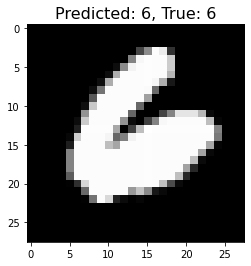

In [330]:
#prediction 1
y_pred = model1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

In [331]:
#architecture B

In [332]:
#prediction
#prediction 2
predicted = model2.predict(x_test)
predicted
pred = np.argmax(predicted, axis = 1)[:10] 
label = np.argmax(y_test,axis = 1)[:10] 


print(predicted)
print(pred) 
print(label)

[[1.05159643e-06 1.08908819e-06 9.31001676e-04 ... 9.98947203e-01
  1.94662389e-05 1.43050065e-05]
 [1.69906917e-03 1.82413032e-06 9.97581363e-01 ... 2.39484689e-06
  8.79157960e-06 5.27433102e-08]
 [1.75066671e-04 9.97906208e-01 1.35088558e-04 ... 1.72310771e-04
  3.30524606e-04 3.32382479e-05]
 ...
 [1.42962847e-07 2.92917048e-06 1.88148121e-07 ... 1.82454230e-07
  2.40097270e-05 6.67686865e-04]
 [6.50131144e-04 4.15938302e-06 1.55066489e-04 ... 3.40797706e-05
  1.33875851e-02 8.64031143e-04]
 [1.17404037e-04 4.24208970e-08 1.31209508e-05 ... 3.05211785e-07
  1.13616763e-04 2.42131523e-06]]
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


[[1.05159643e-06 1.08908819e-06 9.31001676e-04 ... 9.98947203e-01
  1.94662389e-05 1.43050065e-05]
 [1.69906917e-03 1.82413032e-06 9.97581363e-01 ... 2.39484689e-06
  8.79157960e-06 5.27433102e-08]
 [1.75066671e-04 9.97906208e-01 1.35088558e-04 ... 1.72310771e-04
  3.30524606e-04 3.32382479e-05]
 ...
 [1.42962847e-07 2.92917048e-06 1.88148121e-07 ... 1.82454230e-07
  2.40097270e-05 6.67686865e-04]
 [6.50131144e-04 4.15938302e-06 1.55066489e-04 ... 3.40797706e-05
  1.33875851e-02 8.64031143e-04]
 [1.17404037e-04 4.24208970e-08 1.31209508e-05 ... 3.05211785e-07
  1.13616763e-04 2.42131523e-06]]
[7 2 1 ... 4 5 6]


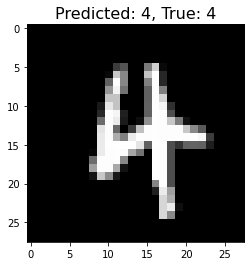

In [333]:
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Question 7
• Evaluate network performance on the MNIST test set

In [334]:
# archietcture A
score = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.33833590149879456
Test accuracy: 0.9125999808311462


In [335]:
#architecture B
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12086284160614014
Test accuracy: 0.9629999995231628


313/313 [==============================] - 0s 431us/step - loss: 0.3383 - accuracy: 0.9126
Test Loss: 0.33833590149879456, Test Accuracy: 0.9125999808311462
[[2.28663761e-04 1.15948467e-06 3.42932355e-04 ... 9.90560472e-01
  2.61276728e-04 5.13791107e-03]
 [1.19626438e-02 4.13600501e-04 8.80410254e-01 ... 7.48948281e-08
  7.90772215e-03 1.55246596e-06]
 [1.29780907e-04 9.40488160e-01 1.93364695e-02 ... 5.66404220e-03
  1.16275856e-02 3.13376333e-03]
 ...
 [4.18575792e-06 1.28128295e-05 1.98030888e-04 ... 7.87251350e-03
  2.31096316e-02 2.10766509e-01]
 [3.20234825e-03 3.04043549e-03 2.34582485e-03 ... 1.03310344e-03
  4.61414546e-01 4.10839636e-03]
 [2.40893612e-04 6.03992811e-09 3.96618707e-04 ... 3.36118333e-08
  6.83196413e-06 6.37595122e-07]]
[7 2 1 ... 4 5 6]


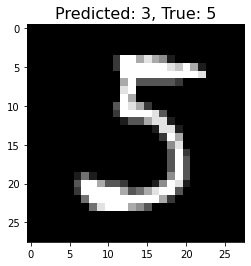

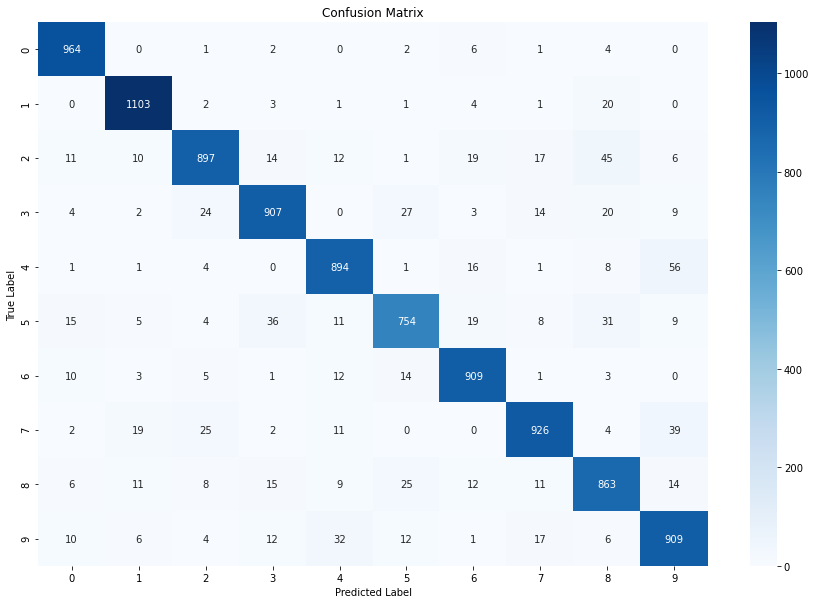

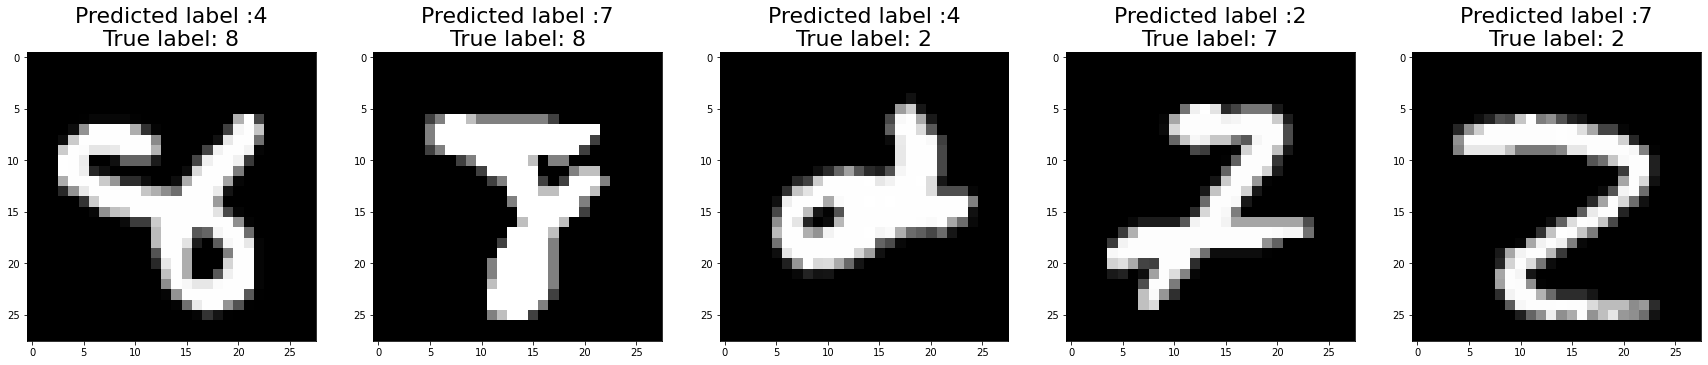

In [336]:
# archietcture A :model 1
"""# Evaluate"""

test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))



"""# Confusion Matrix"""

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

"""# Investigate Some Errors"""

errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

313/313 [==============================] - 0s 507us/step - loss: 0.3383 - accuracy: 0.9126
Test Loss: 0.33833590149879456, Test Accuracy: 0.9125999808311462
[[1.05159643e-06 1.08908819e-06 9.31001676e-04 ... 9.98947203e-01
  1.94662389e-05 1.43050065e-05]
 [1.69906917e-03 1.82413032e-06 9.97581363e-01 ... 2.39484689e-06
  8.79157960e-06 5.27433102e-08]
 [1.75066671e-04 9.97906208e-01 1.35088558e-04 ... 1.72310771e-04
  3.30524606e-04 3.32382479e-05]
 ...
 [1.42962847e-07 2.92917048e-06 1.88148121e-07 ... 1.82454230e-07
  2.40097270e-05 6.67686865e-04]
 [6.50131144e-04 4.15938302e-06 1.55066489e-04 ... 3.40797706e-05
  1.33875851e-02 8.64031143e-04]
 [1.17404037e-04 4.24208970e-08 1.31209508e-05 ... 3.05211785e-07
  1.13616763e-04 2.42131523e-06]]
[7 2 1 ... 4 5 6]


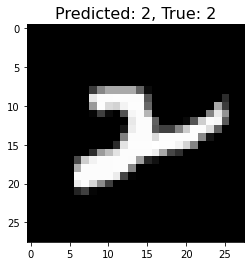

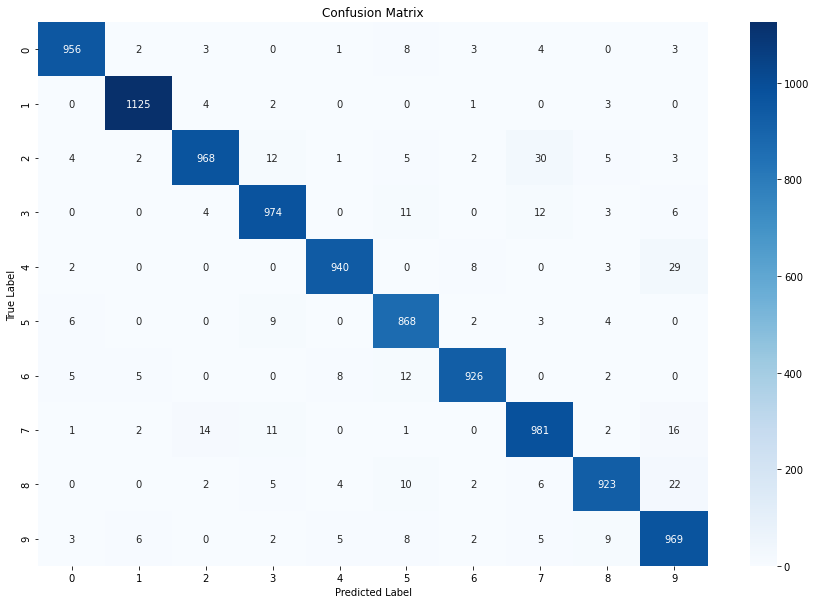

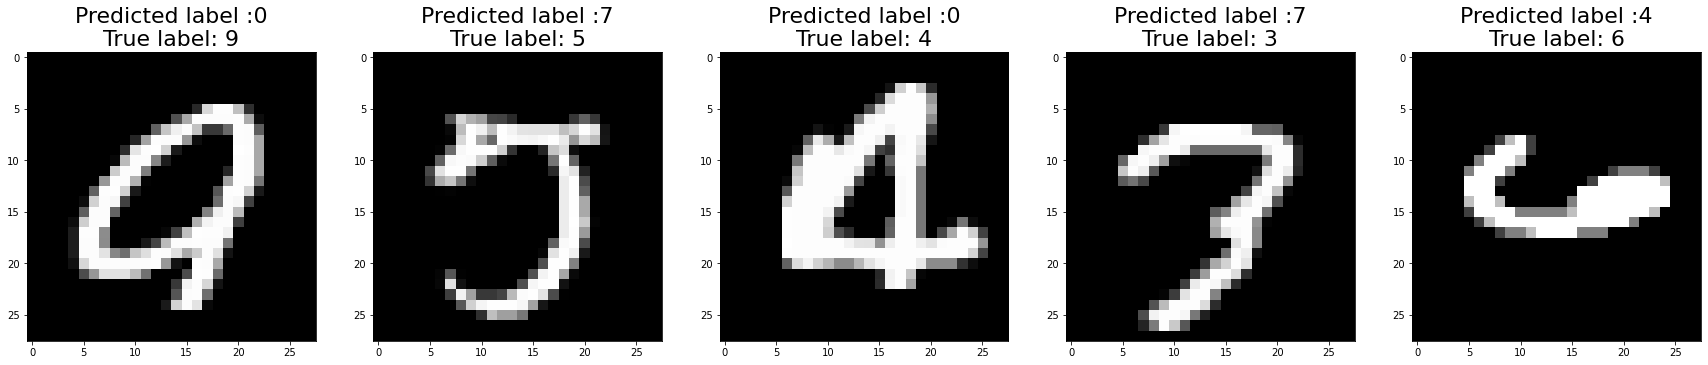

In [337]:
#model 2

"""# Evaluate"""

test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

"""# Confusion Matrix"""

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

"""# Investigate Some Errors"""

errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

# Exercise 3

In [338]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.6.0


# Question1
Present your objective clearly: which task are you performing ?


# Question2
Present the dataset used (dimensions, predictors, target, and some descriptive statistics).

In [348]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [349]:

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [356]:
min(y_train)

0

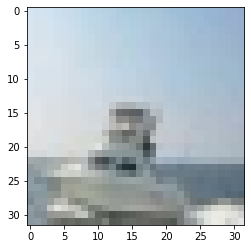

In [363]:
plt.imshow(x_train[100])
plt.show()

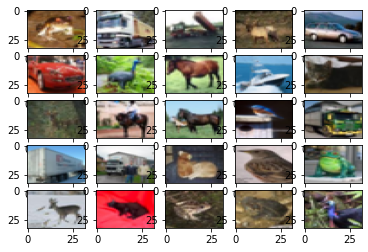

In [364]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [342]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16,

In [343]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [346]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 193s 123ms/step - loss: 0.6590 - accuracy: 0.7734 - val_loss: 0.8054 - val_accuracy: 0.7354
Epoch 2/2
1563/1563 [==============================] - 196s 126ms/step - loss: 0.5608 - accuracy: 0.8086 - val_loss: 0.7217 - val_accuracy: 0.7608


In [347]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 164
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=12)

Epoch 1/50
1562/1562 [==============================] - 203s 130ms/step - loss: 0.7097 - accuracy: 0.7595 - val_loss: 0.6831 - val_accuracy: 0.7737
Epoch 2/50
1562/1562 [==============================] - 206s 132ms/step - loss: 0.6424 - accuracy: 0.7807 - val_loss: 0.7211 - val_accuracy: 0.7601
Epoch 3/50
1562/1562 [==============================] - 206s 132ms/step - loss: 0.5932 - accuracy: 0.7986 - val_loss: 0.7333 - val_accuracy: 0.7563
Epoch 4/50
1562/1562 [==============================] - 209s 134ms/step - loss: 0.5610 - accuracy: 0.8074 - val_loss: 0.5612 - val_accuracy: 0.8131
Epoch 5/50
1562/1562 [==============================] - 207s 133ms/step - loss: 0.5210 - accuracy: 0.8231 - val_loss: 0.4981 - val_accuracy: 0.8370
Epoch 6/50
1562/1562 [==============================] - 207s 132ms/step - loss: 0.4966 - accuracy: 0.8317 - val_loss: 0.5196 - val_accuracy: 0.8280
Epoch 7/50
1562/1562 [==============================] - 207s 132ms/step - loss: 0.4695 - accuracy: 0.8408 - val_

KeyboardInterrupt: 

In [ ]:

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:

# label mapping
 
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 0
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [ ]:

# save the model
model.save('geeksforgeeks.h5')